<a href="https://colab.research.google.com/github/QianFu520/project2/blob/main/new_Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Upload and explore data**

In [2]:
df = pd.read_csv("/content/Wine.csv")
print('Number of Duplicated Rows', df.duplicated().sum())
print('\n')
print(df.info())
df.head()

Number of Duplicated Rows 5452


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB
None


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


I can see that there are duplicated rows, missing values in some columns. There is no wrong datatype.

# Data Cleaning

**Deleted unnecessary columns**

In [3]:
#I decided to delete country column, because there is only one country: Espana, it doesn't make impact on predicting the wine price.
df.drop(columns="country", inplace= True)

**Check and drop any duplicates**

In [4]:
#check for duplicates
df.duplicated().sum()

5452

In [5]:
#Drop all the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.shape

(2048, 10)

# **Identify and address any missing values in this dataset.**


In [7]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

I can see that there are 2 missing values in 'year' column, 106 missing values in "type" column, 271 missing values in "body" column, and 271 missing values in "acidity" column.

**Figure out the method for dealing with the missing values in year column**

In [8]:
missing_values = pd.isna(df["year"])
df[missing_values]

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,131,Vino de Espana,40.0,Tempranillo,4.0,2.0


I choose to  drop these two rows

In [9]:
df.dropna(subset=['year'], inplace=True)

In [10]:
#double check the datashape.
df.shape

(2046, 10)

**Figure out the method for dealing with the missing values in type column**

In [11]:
#check the value count in type column
df["type"].value_counts()

Ribera Del Duero Red    534
Rioja Red               451
Priorat Red             238
Red                     210
Toro Red                 78
Tempranillo              72
Sherry                   56
Rioja White              37
Pedro Ximenez            35
Grenache                 35
Albarino                 34
Cava                     33
Verdejo                  27
Monastrell               18
Mencia                   17
Montsant Red             17
Syrah                    15
Chardonnay               13
Cabernet Sauvignon       11
Sparkling                 5
Sauvignon Blanc           4
Name: type, dtype: int64

To prevent model performance bias, for missing values in type column, I decided to create a new label"Unidentified". I will deal with this after data split

**Figure out the method for dealing with the missing values in body and acidity column**

In [12]:
#check the stats information of body column
df["body"].describe().round(1)

count    1775.0
mean        4.3
std         0.7
min         2.0
25%         4.0
50%         4.0
75%         5.0
max         5.0
Name: body, dtype: float64

In [13]:
#check the most frequent value 
df["body"].value_counts()

4.0    1002
5.0     633
3.0     106
2.0      34
Name: body, dtype: int64

I can see that the most frequent body value is 4.0, the mean value of the body is around 4.3. I can use the SimpleImputer(strategy= 'mean') method to fill in the missing values in body column.I will address this after the data split

In [14]:
#check the stats information of acidity column
df["acidity"].describe().round(1)

count    1775.0
mean        2.9
std         0.3
min         1.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: acidity, dtype: float64

In [15]:
#check the most frequent value
df["acidity"].value_counts()

3.0    1671
2.0      69
1.0      35
Name: acidity, dtype: int64

I can see that the most frequent acidity value is 3.0, the mean value of the body is around 2.9. I can use the SimpleImputer(strategy= 'mean') method to fill in the missing values in acidity column.I will address this after the data split

**Identified and corrected inconsistencies in data for categorical values**

In [16]:
dtypes = df.dtypes
str_cols = dtypes[dtypes=="object"].index
for col in str_cols:
  print(f'-Column={col}')
  print(df[col].value_counts(dropna=False))
  print('\n\n')

-Column=winery
Vega Sicilia                            96
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Bodegas Asenjo & Manso                   1
Binigrau                                 1
Name: winery, Length: 479, dtype: int64



-Column=wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1


I can't tell there are inconsistencies in data for categorical values

**Check stats information for numeric values**

In [17]:
df.describe()

,rating,num_reviews,price,body,acidity
count,2046.000000,2046.000000,2046.000000,1775.000000,1775.000000
mean,4.400978,568.420821,135.147856,4.258592,2.921690
std,0.146946,1351.625345,272.228598,0.652938,0.334181
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.905982,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.000000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


I can tell that there is no impossible values in numeric columns

# Project 2 - Part 3: Create exploratory visuals to further understand the data.

**Identifying any moderate or strong correlations between target and features and/or between one feature and another**

               rating  num_reviews     price      body   acidity
rating       1.000000    -0.109244  0.506900  0.210675 -0.099965
num_reviews -0.109244     1.000000 -0.071231  0.100744  0.062234
price        0.506900    -0.071231  1.000000  0.165796 -0.001132
body         0.210675     0.100744  0.165796  1.000000 -0.087980
acidity     -0.099965     0.062234 -0.001132 -0.087980  1.000000


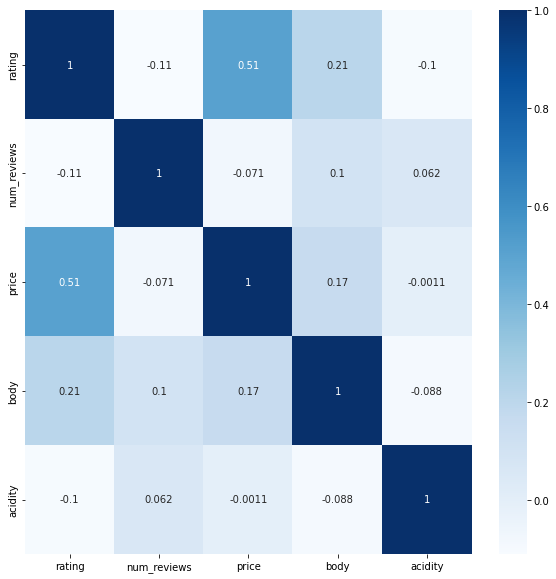

In [18]:
#Looking for correlations between the numerical variables
print(df.corr())
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="Blues", annot=True)

I can see that there is only moderate positive correlation between price and rating, which means that when the rating is high, the price mostly is also high. Most of the other numerical variables don't have much of a correlation on the price.

**Creating multivariate exploratory visuals to further understand data**

**After exploring the data, I found that almost 70% wines are produced from these 5 regions. So, I will split the dataset into two sub datasets: top5 region dataset and other region dataset.**

In [19]:
df1= df.loc[df['region']=='Ribera del Duero']
df2=df.loc[df['region']=='Priorato']
df3=df.loc[df['region']=='Toro']
df4=df.loc[df['region']=='Rioja']
df5=df.loc[df['region']=='Castilla y Leon']

In [20]:
frames = [df1, df2, df3, df4, df5]
df_top5 = pd.concat(frames)

In [21]:
df6=df["region"]!='Ribera del Duero'
df7=df['region']!='Priorato'
df8=df['region']!='Toro'
df9=df['region']!='Rioja'
df10=df['region']!='Castilla y Leon'

In [22]:
df_other=df.loc[df6&df7&df8&df9&df10]

**#visulization 1:  different region's wine's price**

In [23]:
re_group1=df_top5.groupby("region", as_index=False).mean()
re_plot_order1 = re_group1.sort_values(by="price", ascending=False).region.values

In [24]:
re_group2=df_other.groupby("region", as_index=False).mean()
re_plot_order2 = re_group2.sort_values(by="price", ascending=False).region.values

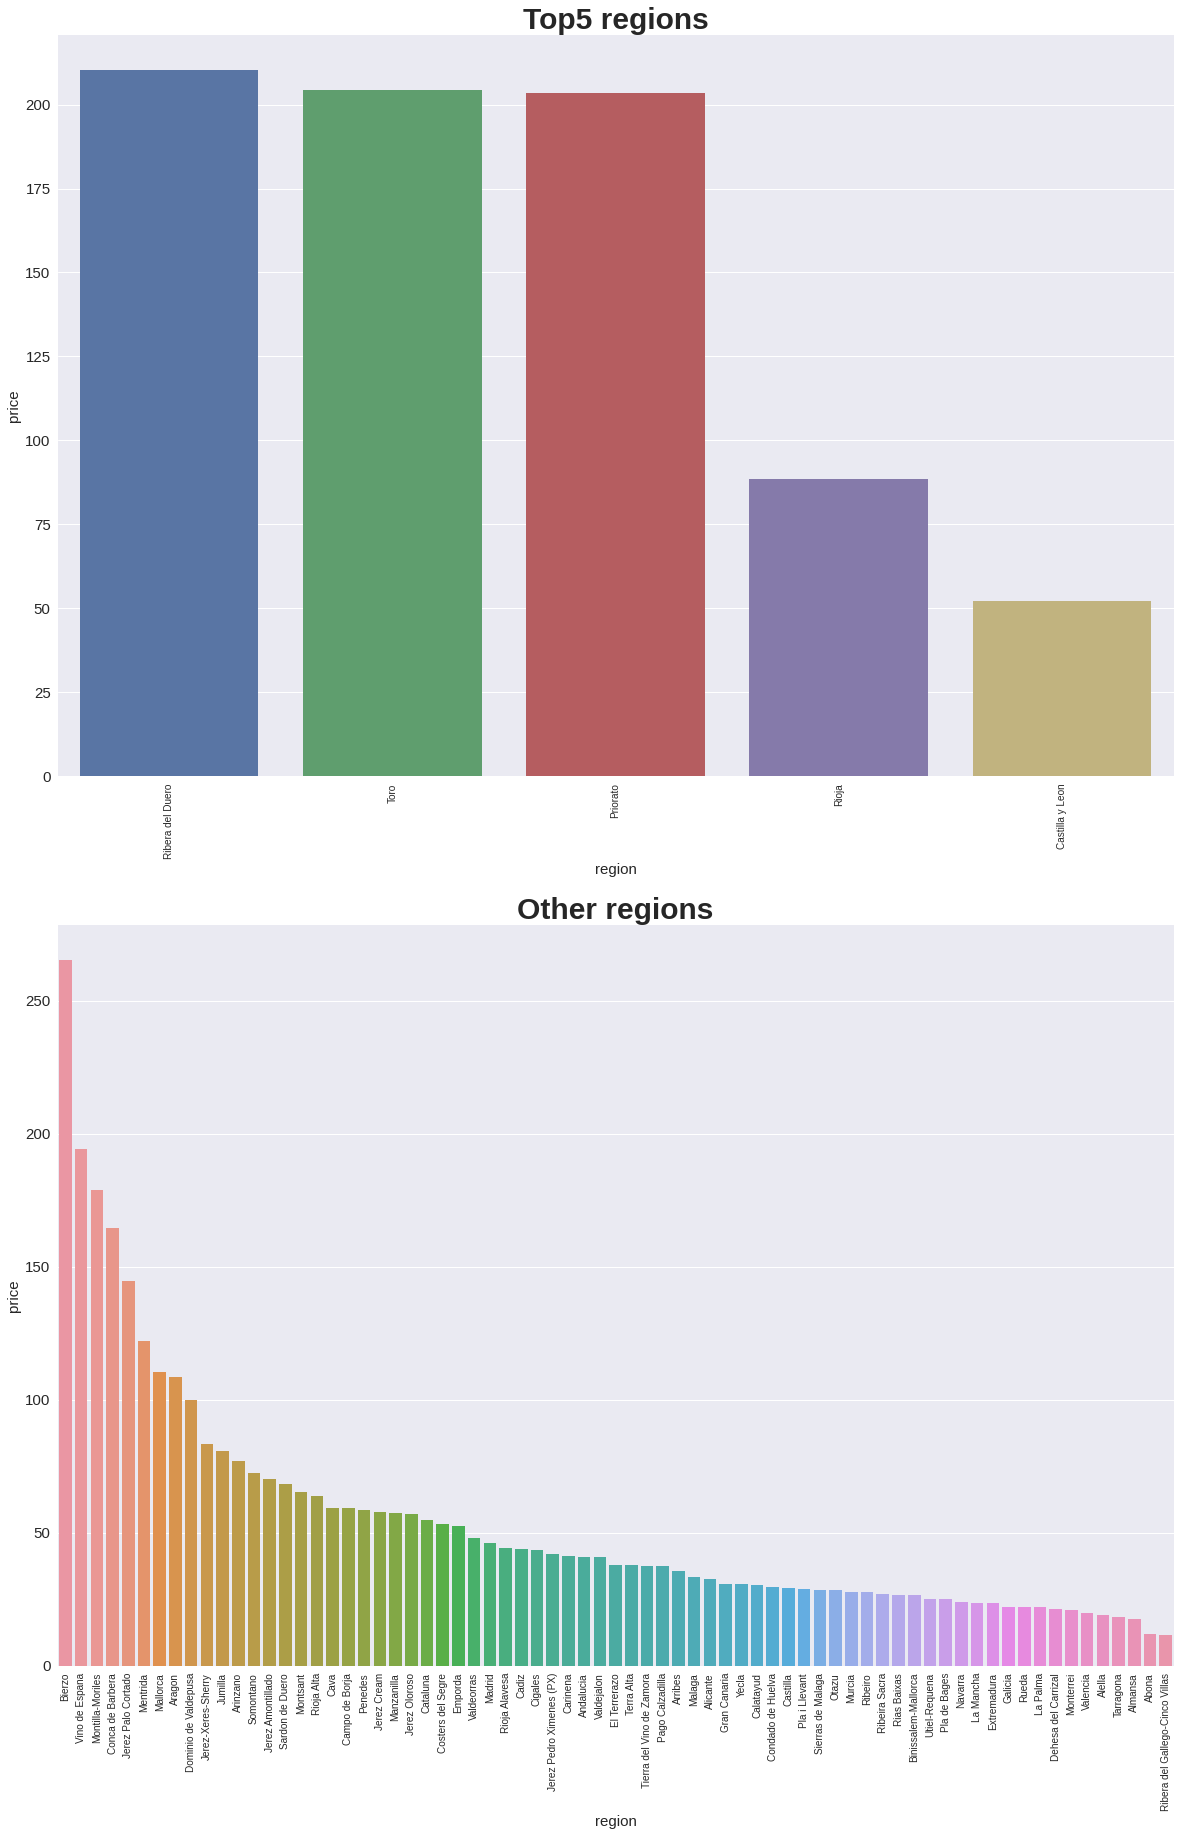

In [25]:

plt.style.use('seaborn')
fig, axes = plt.subplots(2, 1, figsize=(20,30))
sns.barplot(data=df_top5, x='region', y = "price", order=re_plot_order1, ci=None, ax=axes[0])
axes[0].set_title('Top5 regions', fontsize=30, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.barplot(data=df_other, x='region', y = "price", order=re_plot_order2, ci=None, ax=axes[1])
axes[1].set_title('Other regions', fontsize=30, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)

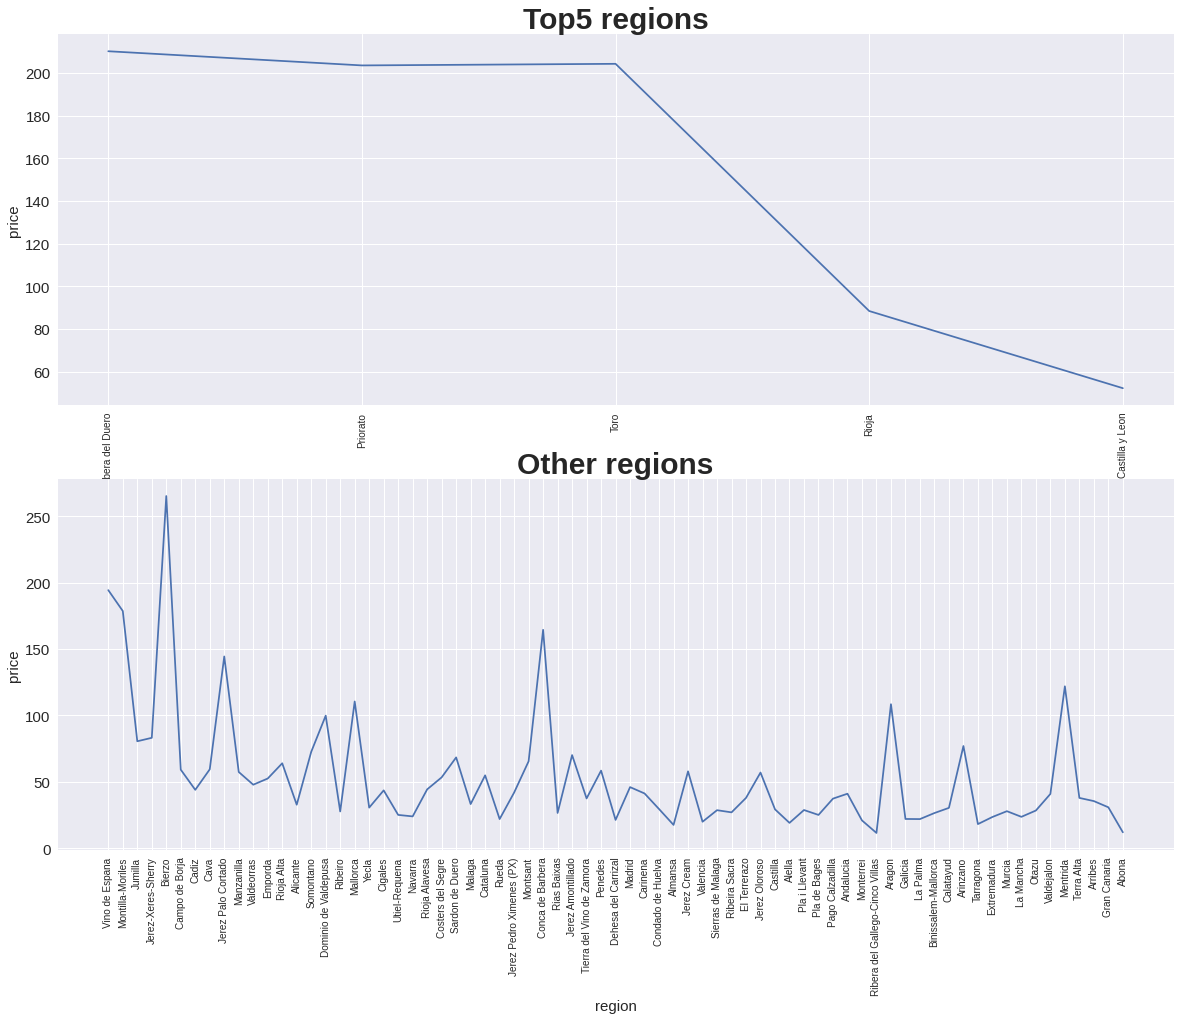

In [41]:
#lineplot
plt.style.use('seaborn')
fig, axes = plt.subplots(2, 1, figsize=(20,15))
sns.lineplot(data=df_top5, x='region', y = "price", ci=None, ax=axes[0])
axes[0].set_title('Top5 regions', fontsize=30, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.lineplot(data=df_other, x='region', y = "price", ci=None, ax=axes[1])
axes[1].set_title('Other regions', fontsize=30, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)

**visulization 2: The price of different type of wine** 

In [26]:
group1=df_top5.groupby("type", as_index=False).mean()
plot_order1 = group1.sort_values(by="price", ascending=False).type.values

In [27]:
group2=df_other.groupby("type", as_index=False).mean()
plot_order2 = group2.sort_values(by="price", ascending=False).type.values

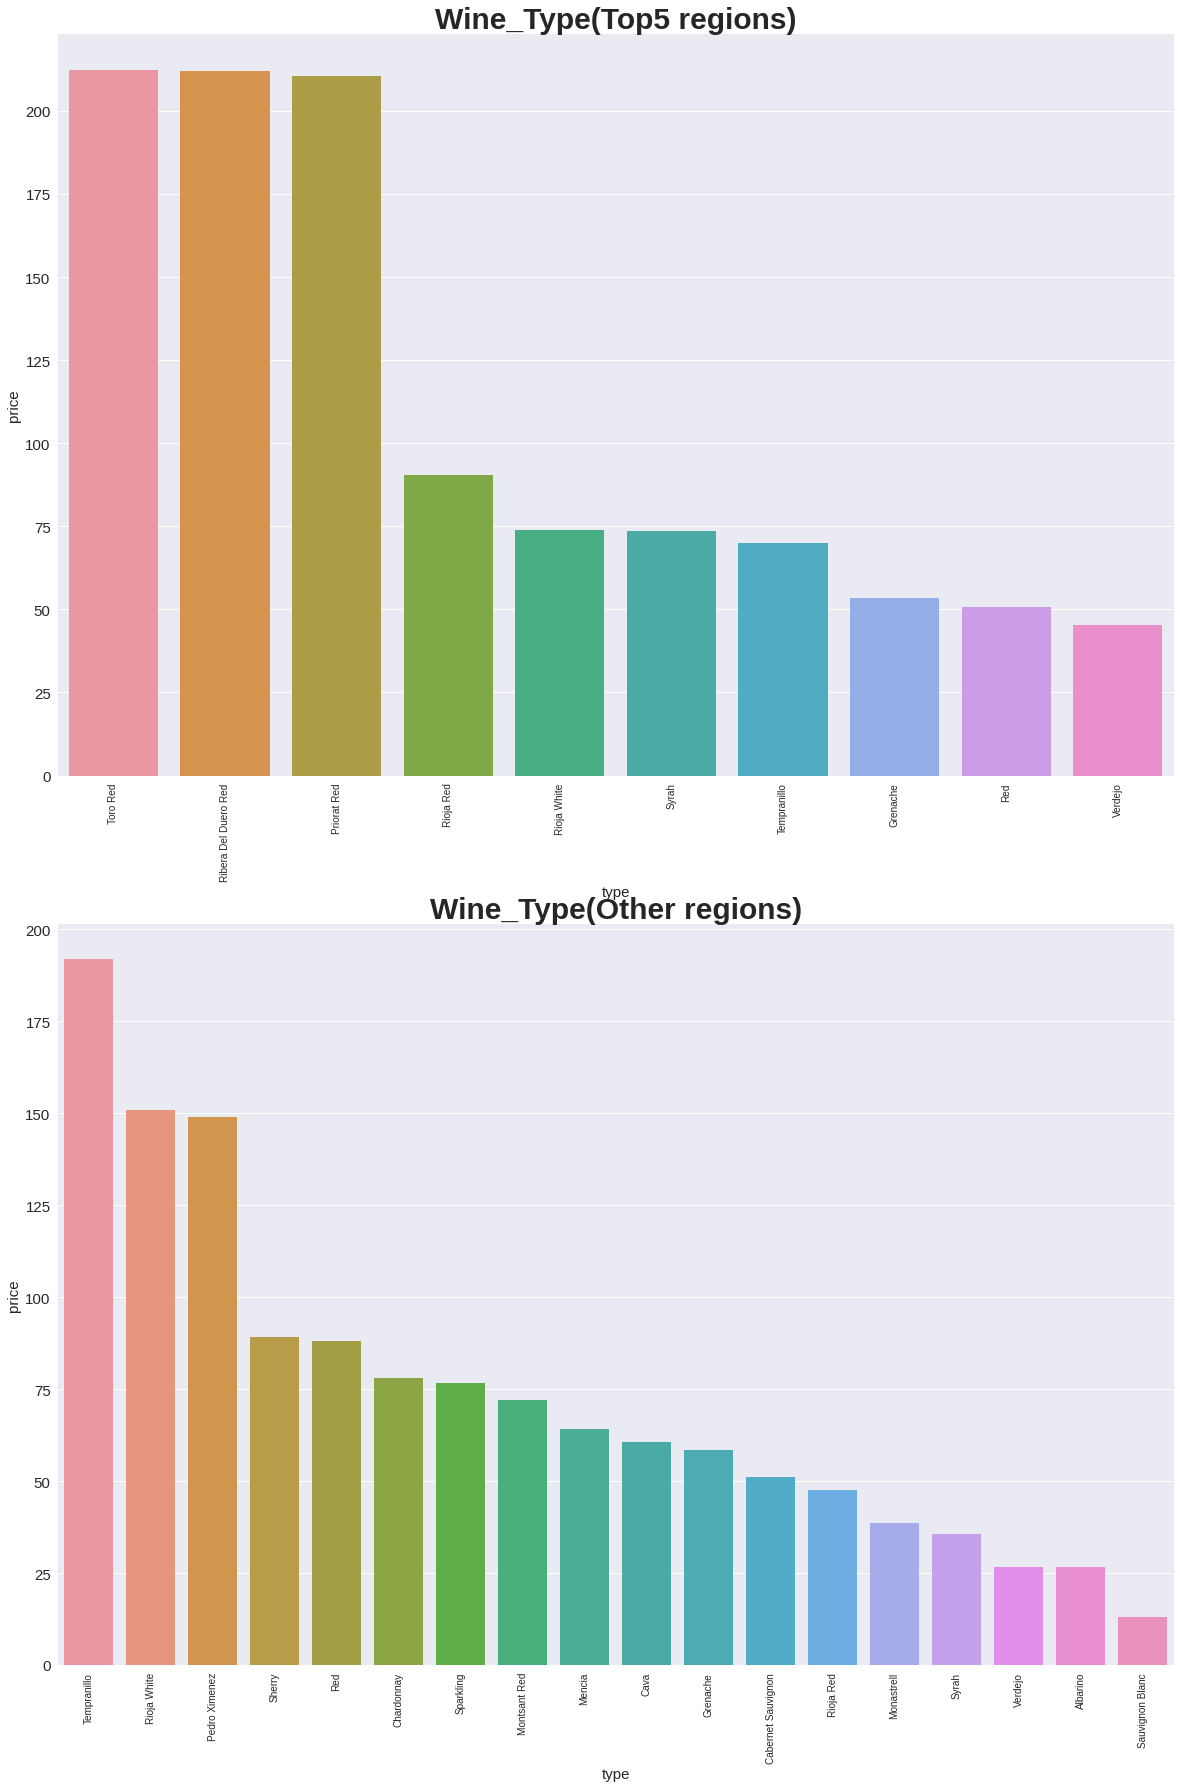

In [28]:
#visulization 2: The price of different type of wine 
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
sns.barplot(data=df_top5, x='type', y = "price", order=plot_order1, ci=None, ax=axes[0])
axes[0].set_title('Wine_Type(Top5 regions)', fontsize=30, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.barplot(data=df_other, x='type', y = "price", order=plot_order2, ci=None, ax=axes[1])
axes[1].set_title('Wine_Type(Other regions)', fontsize=30, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)


**visulization 3: The different rating score wine's price** 

In [29]:
price_top10 = df.sort_values(by=['price'], ascending=False).head(10)

In [30]:
rate_group1=df.groupby("rating", as_index=False).mean()
rate_plot_order1 = rate_group1.sort_values(by="price", ascending=False).rating.values

In [31]:
rate_group2=price_top10.groupby("rating", as_index=False).mean()
rate_plot_order2 = rate_group2.sort_values(by="price", ascending=False).rating.values

In [32]:
rate_group3=df_top5.groupby("rating", as_index=False).mean()
rate_plot_order3 = rate_group3.sort_values(by="price", ascending=False).rating.values

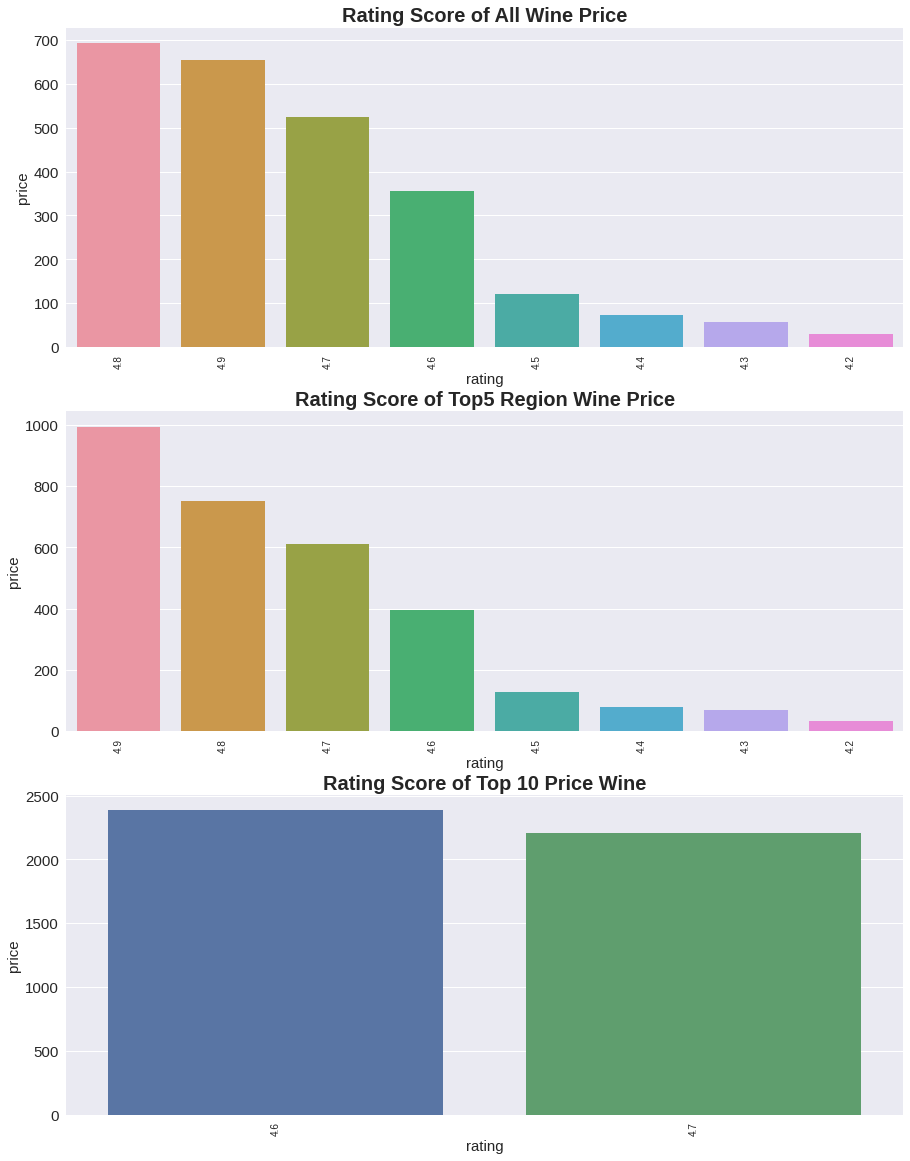

In [38]:
#visulization 3: The different rating score wine's price 
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=3, figsize=(15,20))
sns.barplot(data=df, x='rating', y = "price", order=rate_plot_order1, ci=None, ax=axes[0])
axes[0].set_title('Rating Score of All Wine Price', fontsize=20, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)


sns.barplot(data=df_top5, x='rating', y = "price", order=rate_plot_order3, ci=None, ax=axes[1])
axes[1].set_title('Rating Score of Top5 Region Wine Price', fontsize=20, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)

sns.barplot(data=price_top10, x='rating', y = "price", order=rate_plot_order2, ci=None, ax=axes[2])
axes[2].set_title('Rating Score of Top 10 Price Wine', fontsize=20, fontweight='bold')
axes[2].xaxis.get_label().set_fontsize(15)
axes[2].yaxis.get_label().set_fontsize(15)
axes[2].tick_params(axis="x", labelsize=10, rotation=90)
axes[2].tick_params(axis="y", labelsize=15)

**visulization 4: Different year's wine's price**

In [34]:
year_group1=df_top5.groupby("year", as_index=False).mean()
year_plot_order1 = year_group1.sort_values(by="price", ascending=False).year.values

In [39]:
year_group2=df_other.groupby("year", as_index=False).mean()
year_plot_order2 = year_group2.sort_values(by="price", ascending=False).year.values

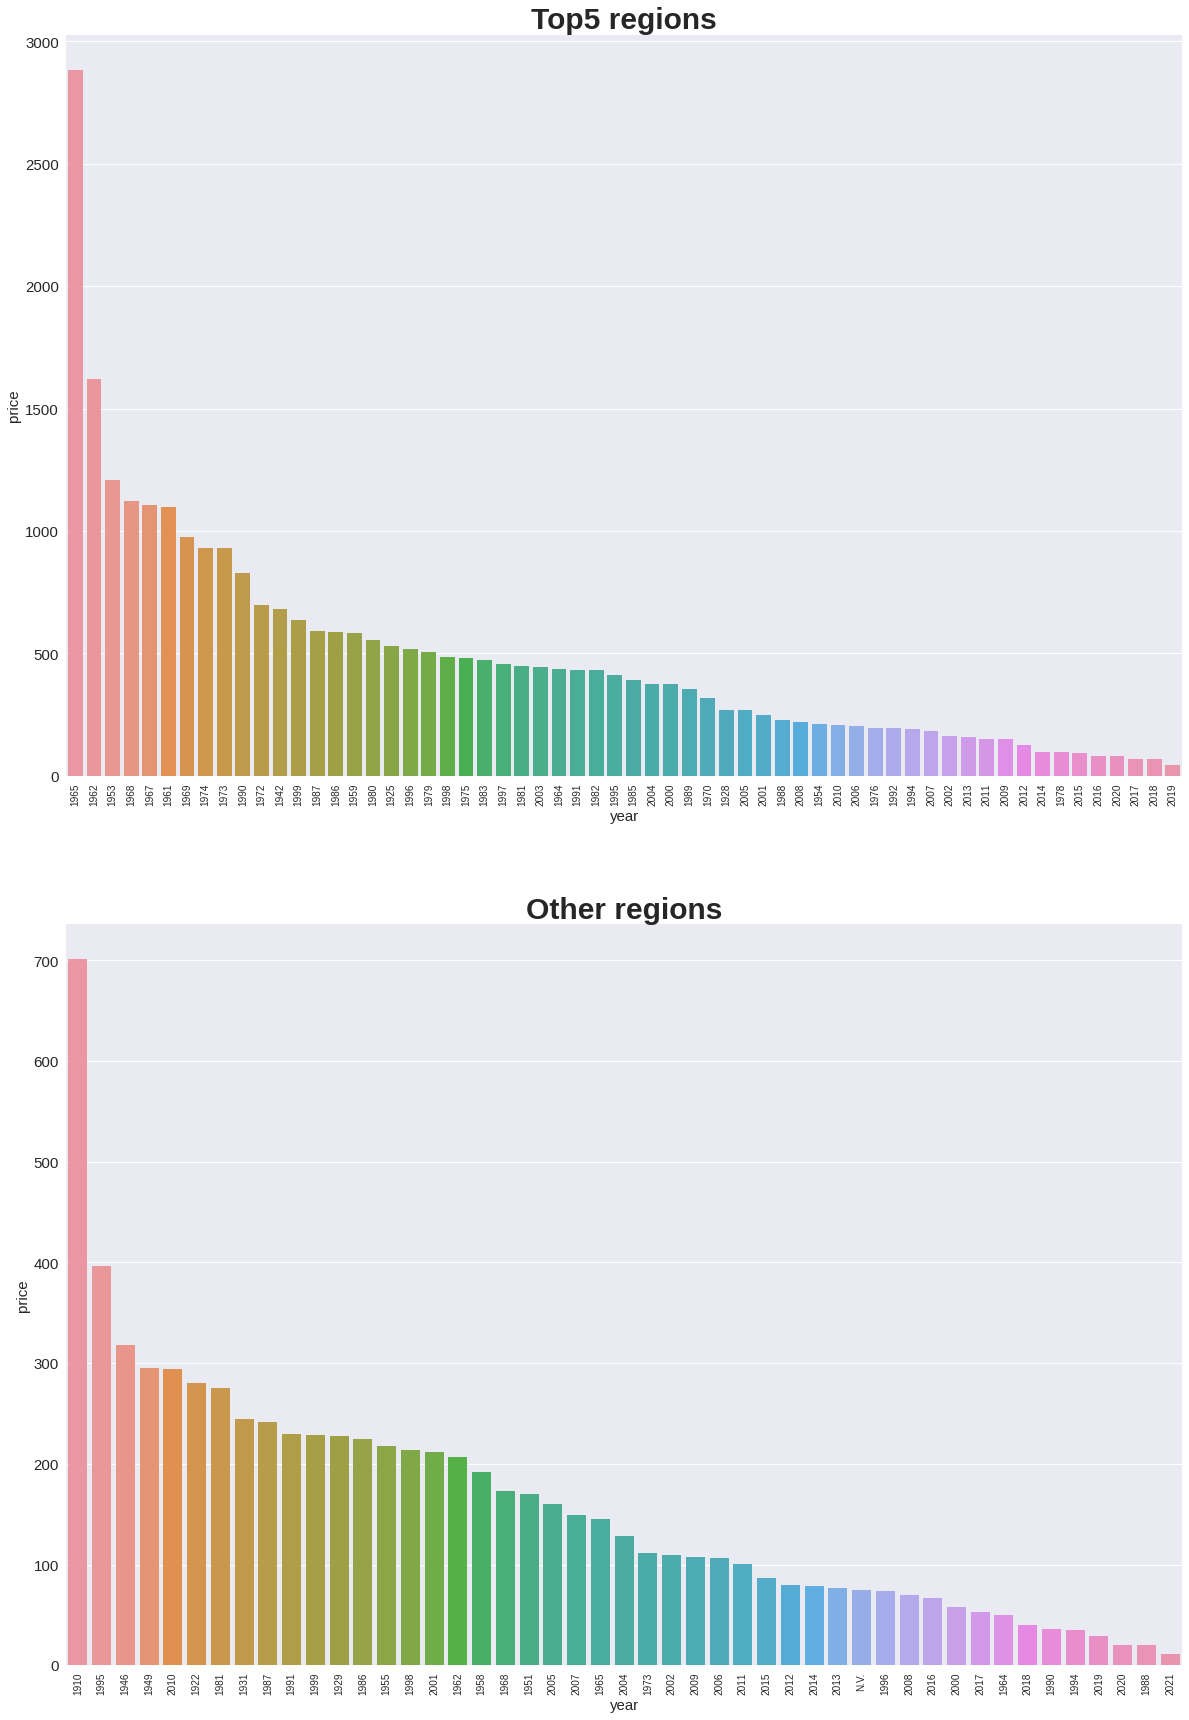

In [40]:
#visulization 4: Different year's wine's price 
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
sns.barplot(data=df_top5, x='year', y = "price", order=year_plot_order1, ci=None, ax=axes[0])
axes[0].set_title('Top5 regions', fontsize=30, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10, rotation=90)
axes[0].tick_params(axis="y", labelsize=15)

sns.barplot(data=df_other, x='year', y = "price", order=year_plot_order2, ci=None, ax=axes[1])
axes[1].set_title('Other regions', fontsize=30, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10, rotation=90)
axes[1].tick_params(axis="y", labelsize=15)

**visulization 5: Different body score and acidity score wine price**

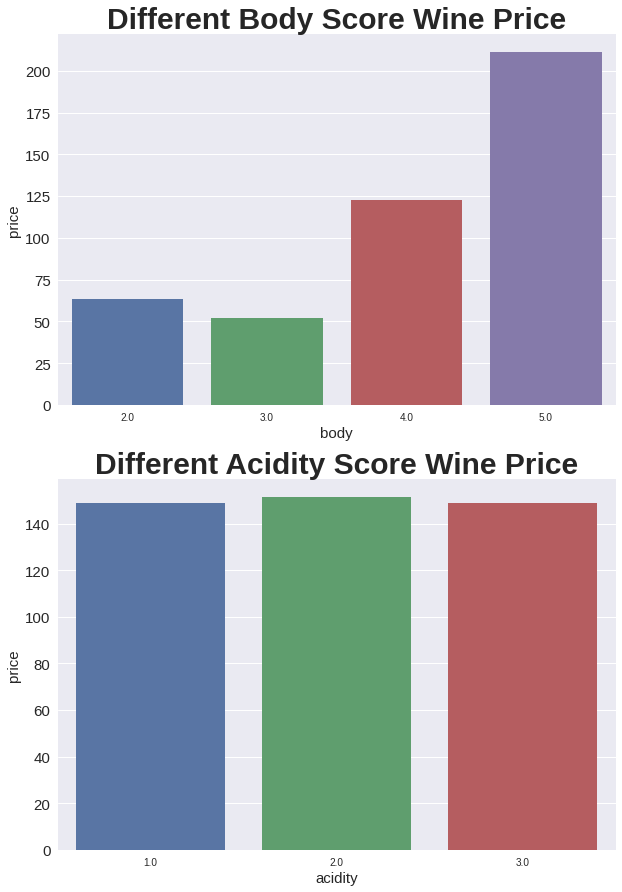

In [37]:
#visulization 5: Different body score and acidity score wine price
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, figsize=(10,15))
sns.barplot(data=df, x='body', y = "price", ci=None, ax=axes[0])
axes[0].set_title('Different Body Score Wine Price', fontsize=30, fontweight='bold')
axes[0].xaxis.get_label().set_fontsize(15)
axes[0].yaxis.get_label().set_fontsize(15)
axes[0].tick_params(axis="x", labelsize=10)
axes[0].tick_params(axis="y", labelsize=15)

sns.barplot(data=df, x='acidity', y = "price", ci=None, ax=axes[1])
axes[1].set_title('Different Acidity Score Wine Price', fontsize=30, fontweight='bold')
axes[1].xaxis.get_label().set_fontsize(15)
axes[1].yaxis.get_label().set_fontsize(15)
axes[1].tick_params(axis="x", labelsize=10)
axes[1].tick_params(axis="y", labelsize=15)

# Key findings from above exploratory visuals


*   There is only one moderate positive correlation between price(target) and rating.
*  There are total 76 regions, but 70% of the wine are made from 5 regions. In these 5 regions, 3 regions' wine's average price above 200. In the rest 71 regions, only one region's wine's average price above 200


*   In the top 5 regions, there are 3/10 types of wine's average price above 200. In the rest of 71 regions, there is no type of wine's average price above 200. Overall, there are 6/21 types of wine's average price above 100.



*    The most expensive 10 wines's rating score are 4.6 or 4.7. The wines from top 5 regions, rating score from 4.2 to 4.9, follow the trend: higher rating score higher price. Overall, the wines have the lowest rating score also have the lowest average price. But, the wines have the highest average price, don't have the highest rating score.
*   In the top 5 regions, the most expensive wine (over2500) made in 1965 and the cheapest wine made in 2019. In the rest 71 regions, the most expensive wine (about 700) made in 1910. 



*   The wine's acidity score  makes very little impact on wine's price
*   For the body score, the general trend is higher body score higher price. However, the wine with the lowest body score was not cheapest wine, the cheapest wine's body score was 3.0. 








